<a href="https://colab.research.google.com/github/signLangProjectNIC/tf-cnn-lstm4/blob/main/tf_cnn_lstm13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
from moviepy.editor import *
import cv2
import moviepy
import sys

def inputData(file1,nFrames=20,frameSize=(50,50)):
    #file1 IS THE FILE THAT CONTAINS THE FOLDERS OF VARIOUS CATEGORIES WITH EACH 
    #EACH CATEGORY CONSISITING OF VARIOUS VIDEOS OF THAT CATEGORY
    # array=np.zeros(shape=(8,52,200,480,640,3),dtype=int)
    mappingCatToN=mapCatToNumber(file1)
    i=0
    j=0
    k=0
    array=list()
    y=[]
    for category in os.listdir(file1):
      print("Category: ",category)
      vidPath=os.path.join(file1,category)
      # print(vidPath)
      try:
        vidObj = moviepy.editor.VideoFileClip(vidPath)
      except IOError as e:
        errno, strerror = e.args
        print(errno)
        print(strerror)
      video_duration = int(vidObj.duration) 
      for k in range(nFrames):
        frame=vidObj.get_frame((k+1)*video_duration/(nFrames*1.0))
        if k==10:
          plt.imshow(frame)
          plt.show()
        frameR=Image.fromarray(frame).convert("RGB")
        frame2=frameR.resize(frameSize)
        arrayi=np.array(frame2)
        # print(np.shape(arrayi))
        array.append(arrayi)
      print(category)
      y.append(category)
      i+=1 
    print(i)
    print(j)
    return array,y

In [53]:
def mapCatToNumber(file1):
  strings=[]
  for cat in os.listdir(file1):
    strings.append(cat)
  stringsS=sorted(strings)
  answer={}
  for i in range(len(stringsS)):
    answer[stringsS[i]]=i
  return answer

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Category:  accident_Crop_001_01.avi


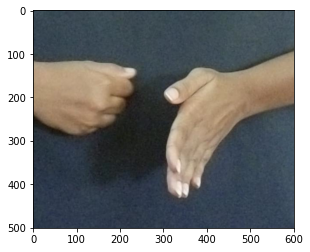

accident_Crop_001_01.avi
Category:  call_Crop_001_01.avi


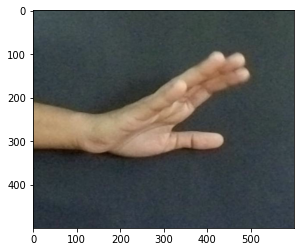

call_Crop_001_01.avi
Category:  hot_Crop_001_02.avi


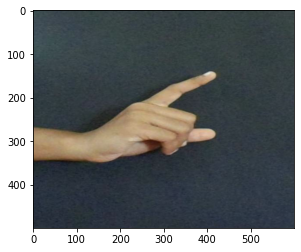

hot_Crop_001_02.avi
Category:  doctor_Crop_002_02.avi


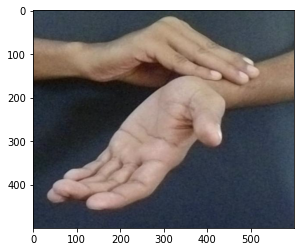

  UserWarning)



doctor_Crop_002_02.avi
Category:  help_Crop_001_02.avi


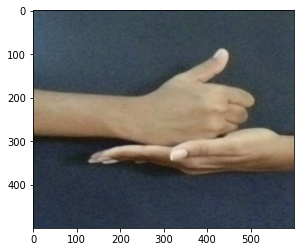

help_Crop_001_02.avi
Category:  lose_Crop_001_01.avi


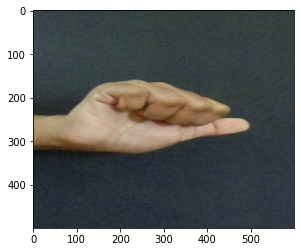

lose_Crop_001_01.avi
Category:  thief_Crop_001_02.avi


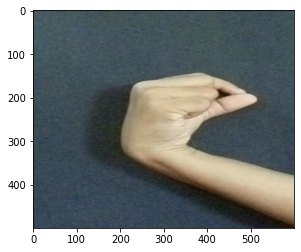

thief_Crop_001_02.avi
Category:  pain_Crop_001_02.avi


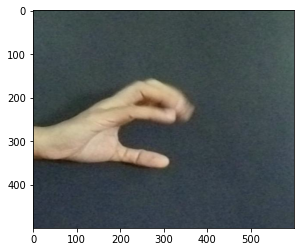

pain_Crop_001_02.avi
8
0


In [69]:
from google.colab import drive
drive.mount('/content/gdrive')
testData,y=inputData("/content/gdrive/MyDrive/test videos2")

In [70]:
testData=np.asarray(testData).reshape(8,20,50,50,3)

In [71]:
print(y)

['accident_Crop_001_01.avi', 'call_Crop_001_01.avi', 'hot_Crop_001_02.avi', 'doctor_Crop_002_02.avi', 'help_Crop_001_02.avi', 'lose_Crop_001_01.avi', 'thief_Crop_001_02.avi', 'pain_Crop_001_02.avi']


In [72]:
TD=(testData-np.mean(testData))/np.std(testData)

In [39]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.0.32.42:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.0.32.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.0.32.42:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [40]:
import numpy as np
import tensorflow.keras.layers as tfKL
from keras.layers import Activation, Dense 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import random
import pandas as pd

nLookback=4
height=50
width=50
channels=3
nCategories=8

In [41]:
X=np.load("/content/gdrive/MyDrive/hand sign database array X.npy")
Y=np.load("/content/gdrive/MyDrive/hand sign database array Y.npy")
Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
X=(X-Xmean)/Xstd
nCategories=8
Xmean=np.mean(X)
Xstd=np.std(X)
print(Xmean)
print(Xstd)
trainSetX=list()
testSetX=list()
trainSetY=list()
testSetY=list()
for i in range(nCategories):
  wholeset=list()
  for j in range(np.shape(Y)[0]):
    if(Y[j]==i):
      wholeset.append(j)
  
  traini,testi=train_test_split(wholeset,test_size=0.22)
  for x in traini:
    trainSetX.append(X[x])
    trainSetY.append(Y[x])
  for x in testi:
    testSetX.append(X[x])
    testSetY.append(Y[x])

76.08792970149254
37.221323957827764
-7.58063079786192e-17
0.9999999999999996


In [42]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfKL
from tensorflow.keras import regularizers
from keras.layers import Activation, Dense 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import random
import pandas as pd

In [43]:
def createModel(layers,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam'):
  with tpu_strategy.scope():
    model=tf.keras.Sequential()
    for layer in layers:
      model.add(layer)
    model.compile(metrics=metrics,loss=loss,optimizer=optimizer)    
    return model

In [44]:
def evaluateModel(layers,trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam',nSubsequences=5,nLookback=4,nCategories=8,verbose=0,epochs=30,batch_size=10):
  
  with tpu_strategy.scope(): 
    trainX=np.asarray(trainX)
    trainY=np.asarray(trainY)
    valX=np.asarray(valX)
    valY=np.asarray(valY)
    height=trainX.shape[2]
    width=trainX.shape[3]
    channels=trainX.shape[4]
    trainX=trainX.reshape((trainX.shape[0],nSubsequences,nLookback,trainX.shape[2],trainX.shape[3],trainX.shape[4]))
    trainY=tf.keras.utils.to_categorical(trainY)

    
    valX=valX.reshape((valX.shape[0],nSubsequences,nLookback,valX.shape[2],valX.shape[3],valX.shape[4]))
    valY=tf.keras.utils.to_categorical(valY)
  print(np.shape(trainX))
  print(np.shape(trainY))
  print(np.shape(valX))
  print(np.shape(valY))
  with tpu_strategy.scope():
    model=createModel(layers=layers,metrics=metrics,loss=loss,optimizer=optimizer)
    # print(trainX)
    history=model.fit(x=trainX,y=trainY,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_data =(valX,valY))

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
  return model

(310, 5, 4, 50, 50, 3)
(310, 8)
(92, 5, 4, 50, 50, 3)
(92, 8)
Epoch 1/300
31/31 - 16s - loss: 2.3812 - accuracy: 0.2258 - val_loss: 1.8021 - val_accuracy: 0.3152
Epoch 2/300
31/31 - 3s - loss: 1.6374 - accuracy: 0.3839 - val_loss: 1.5729 - val_accuracy: 0.4239
Epoch 3/300
31/31 - 3s - loss: 1.4829 - accuracy: 0.5742 - val_loss: 1.5243 - val_accuracy: 0.5543
Epoch 4/300
31/31 - 3s - loss: 1.4426 - accuracy: 0.5355 - val_loss: 1.4789 - val_accuracy: 0.5217
Epoch 5/300
31/31 - 3s - loss: 1.3335 - accuracy: 0.6387 - val_loss: 1.3935 - val_accuracy: 0.5870
Epoch 6/300
31/31 - 3s - loss: 1.2960 - accuracy: 0.6774 - val_loss: 1.3982 - val_accuracy: 0.6304
Epoch 7/300
31/31 - 3s - loss: 1.3078 - accuracy: 0.6484 - val_loss: 1.2771 - val_accuracy: 0.6848
Epoch 8/300
31/31 - 3s - loss: 1.1973 - accuracy: 0.6871 - val_loss: 1.2880 - val_accuracy: 0.6522
Epoch 9/300
31/31 - 3s - loss: 1.2103 - accuracy: 0.6581 - val_loss: 1.2312 - val_accuracy: 0.6522
Epoch 10/300
31/31 - 3s - loss: 1.1452 - accur

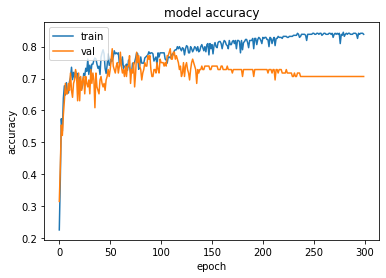

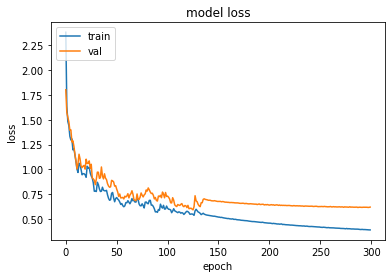

In [45]:
layers=list()
layers.append(tfKL.TimeDistributed(tfKL.Conv3D(filters=64,kernel_size=(3,3,3),activation='relu',trainable=True),input_shape=(None,nLookback,height,width,channels)))
layers.append(tfKL.TimeDistributed(tfKL.Flatten()))
layers.append(tfKL.LSTM(units=100,activation='tanh',trainable=True))
layers.append(tfKL.Dense(units=8,activation='softmax',trainable=True))
with tpu_strategy.scope(): 
  model=evaluateModel(trainX=trainSetX,trainY=trainSetY,valX=testSetX,valY=testSetY,layers=layers,epochs=300,verbose=2)
  

In [73]:
TestSetX=list()
TestSetY=list()
for i in range(nCategories):
  Wholeset=list()
  TestSetX.append(TD[i])
  TestSetY.append(y[i])
print(np.shape(TD))
print(np.shape(TestSetX))
TestSetX=np.reshape(np.asarray(TestSetX),(8,5,4,50,50,3))
answer=model.predict(TestSetX)
print(np.argmax(answer,axis=1))

(8, 20, 50, 50, 3)
(8, 20, 50, 50, 3)
[0 6 4 2 3 6 7 1]


In [74]:
print(np.argmax(answer,axis=0))

[0 7 3 4 2 5 1 6]


In [60]:
print(TestSetY) #0 1 4 2 3 5 7 6 score: 5/8

['accident_Crop_001_01.avi', 'call_Crop_001_01.avi', 'hot_Crop_001_02.avi', 'doctor_Crop_002_02.avi', 'help_Crop_001_02.avi', 'lose_Crop_001_01.avi', 'thief_Crop_001_02.avi', 'pain_Crop_001_02.avi']


In [65]:
TestSetX=list()
TestSetY=list()
for i in range(nCategories):
  Wholeset=list()
  TestSetX.append(TD[i])
  TestSetY.append(y[i])
print(np.shape(TD))
print(np.shape(TestSetX))
TestSetX=np.reshape(np.asarray(TestSetX),(8,5,4,50,50,3))
answer=model.predict(TestSetX)
print(np.argmax(answer,axis=1))

(8, 20, 50, 50, 3)
(8, 20, 50, 50, 3)
[4 2 6 2 3 0 7 4]


In [67]:
print(np.argmax(answer,axis=0))

[5 2 3 4 7 0 2 6]


In [66]:
print(TestSetY) #1 6 4 2 3 0 7 5 score: 4/8

['call.mp4', 'pain.mp4', 'hot.mp4', 'doctor.mp4', 'help.mp4', 'accident.mp4', 'thief.mp4', 'lose.mp4']


In [ ]:
# {'accident': 0, 'call': 1, 'doctor': 2, 'help': 3, 'hot': 4, 'lose': 5, 'pain': 6, 'thief': 7}